In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [4]:
data = pd.read_csv('Diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
import warnings
warnings.filterwarnings('ignore')

data['Glucose'].replace(to_replace = 0, value = data['Glucose'].mean(), inplace=True)
data['BloodPressure'].replace(to_replace = 0, value = data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].replace(to_replace = 0, value = data['SkinThickness'].mean(), inplace=True)
data['Insulin'].replace(to_replace = 0, value = data['Insulin'].mean(), inplace=True)
data['BMI'].replace(to_replace = 0, value = data['BMI'].mean(), inplace=True)

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Outcome', ylabel='count'>

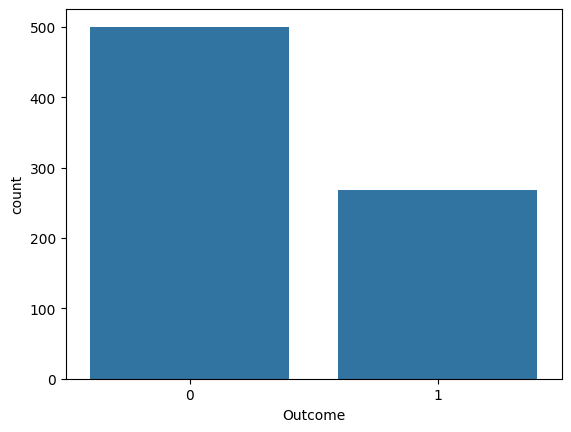

In [12]:
sns.countplot(x = data["Outcome"])

Pregnancies          Axes(0.125,0.77;0.227941x0.11)
Glucose           Axes(0.398529,0.77;0.227941x0.11)
BloodPressure     Axes(0.672059,0.77;0.227941x0.11)
SkinThickness       Axes(0.125,0.638;0.227941x0.11)
Insulin          Axes(0.398529,0.638;0.227941x0.11)
BMI              Axes(0.672059,0.638;0.227941x0.11)
Pedigree            Axes(0.125,0.506;0.227941x0.11)
Age              Axes(0.398529,0.506;0.227941x0.11)
Outcome          Axes(0.672059,0.506;0.227941x0.11)
dtype: object

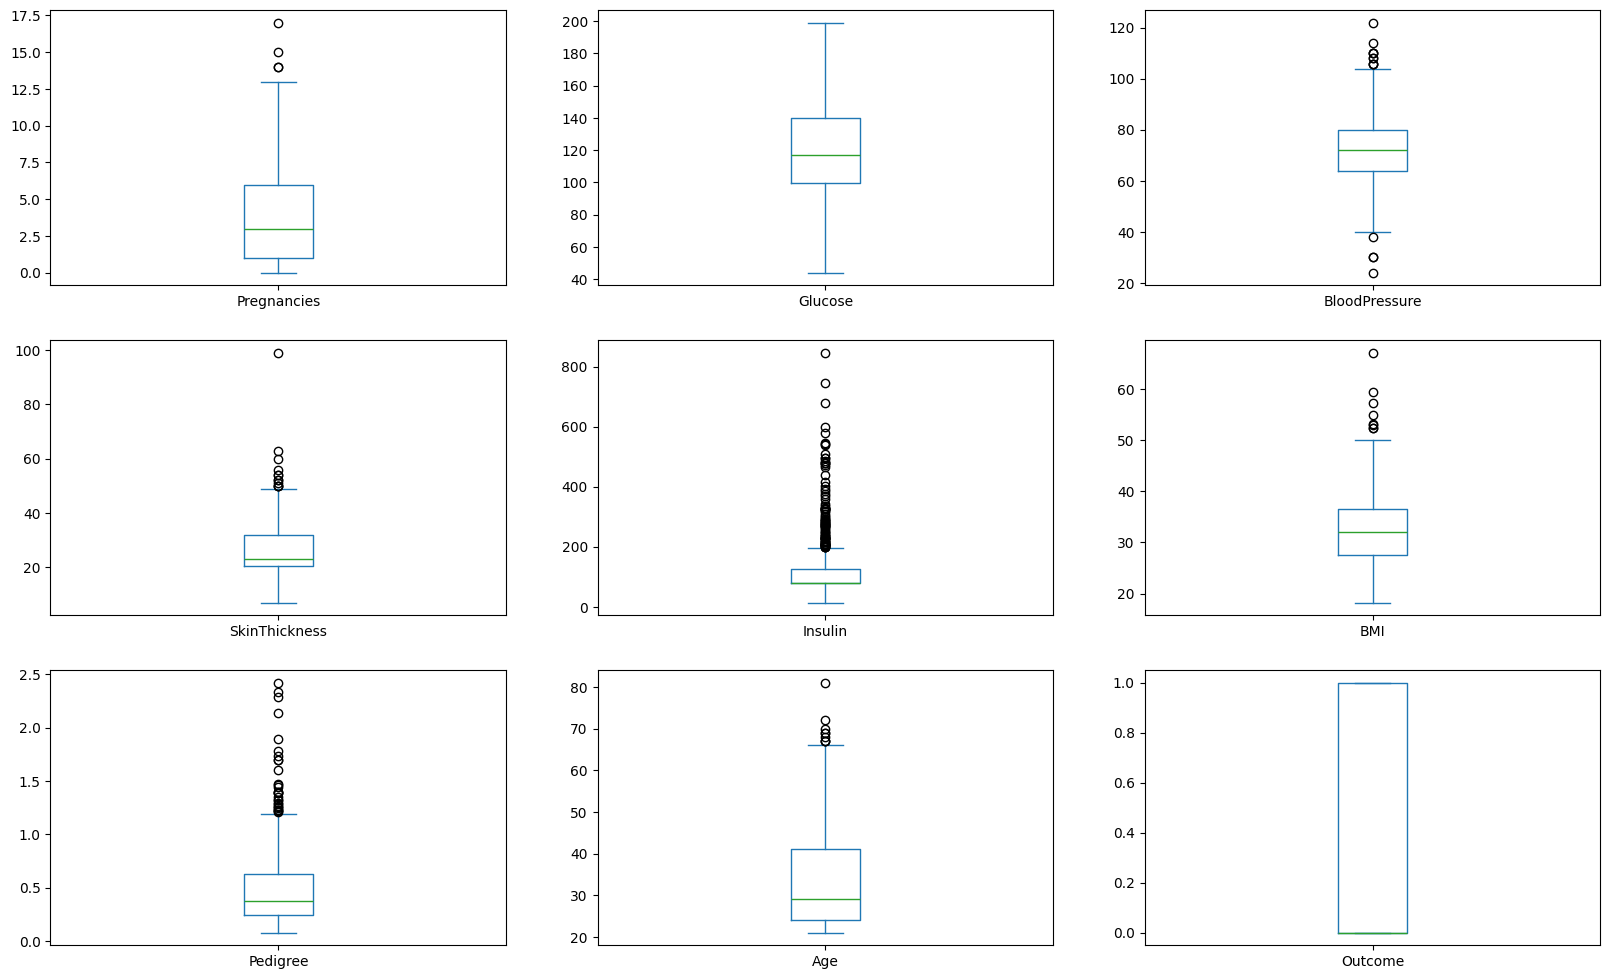

In [13]:
data.plot(kind='box', subplots = True, layout = (6, 3), figsize= (20, 25))

In [14]:
def remove_outlier(df1, c):
    q1 = df1[c].quantile(0.25)
    q3 = df1[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data[c] = np.clip(df1[c], lower, upper)
    return df1

def remove_all(df1, cols):
    for c in cols:
        df1 = remove_outlier(data, c)
    return df1

In [15]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']
data = remove_all(data , cols)

Pregnancies          Axes(0.125,0.77;0.227941x0.11)
Glucose           Axes(0.398529,0.77;0.227941x0.11)
BloodPressure     Axes(0.672059,0.77;0.227941x0.11)
SkinThickness       Axes(0.125,0.638;0.227941x0.11)
Insulin          Axes(0.398529,0.638;0.227941x0.11)
BMI              Axes(0.672059,0.638;0.227941x0.11)
Pedigree            Axes(0.125,0.506;0.227941x0.11)
Age              Axes(0.398529,0.506;0.227941x0.11)
Outcome          Axes(0.672059,0.506;0.227941x0.11)
dtype: object

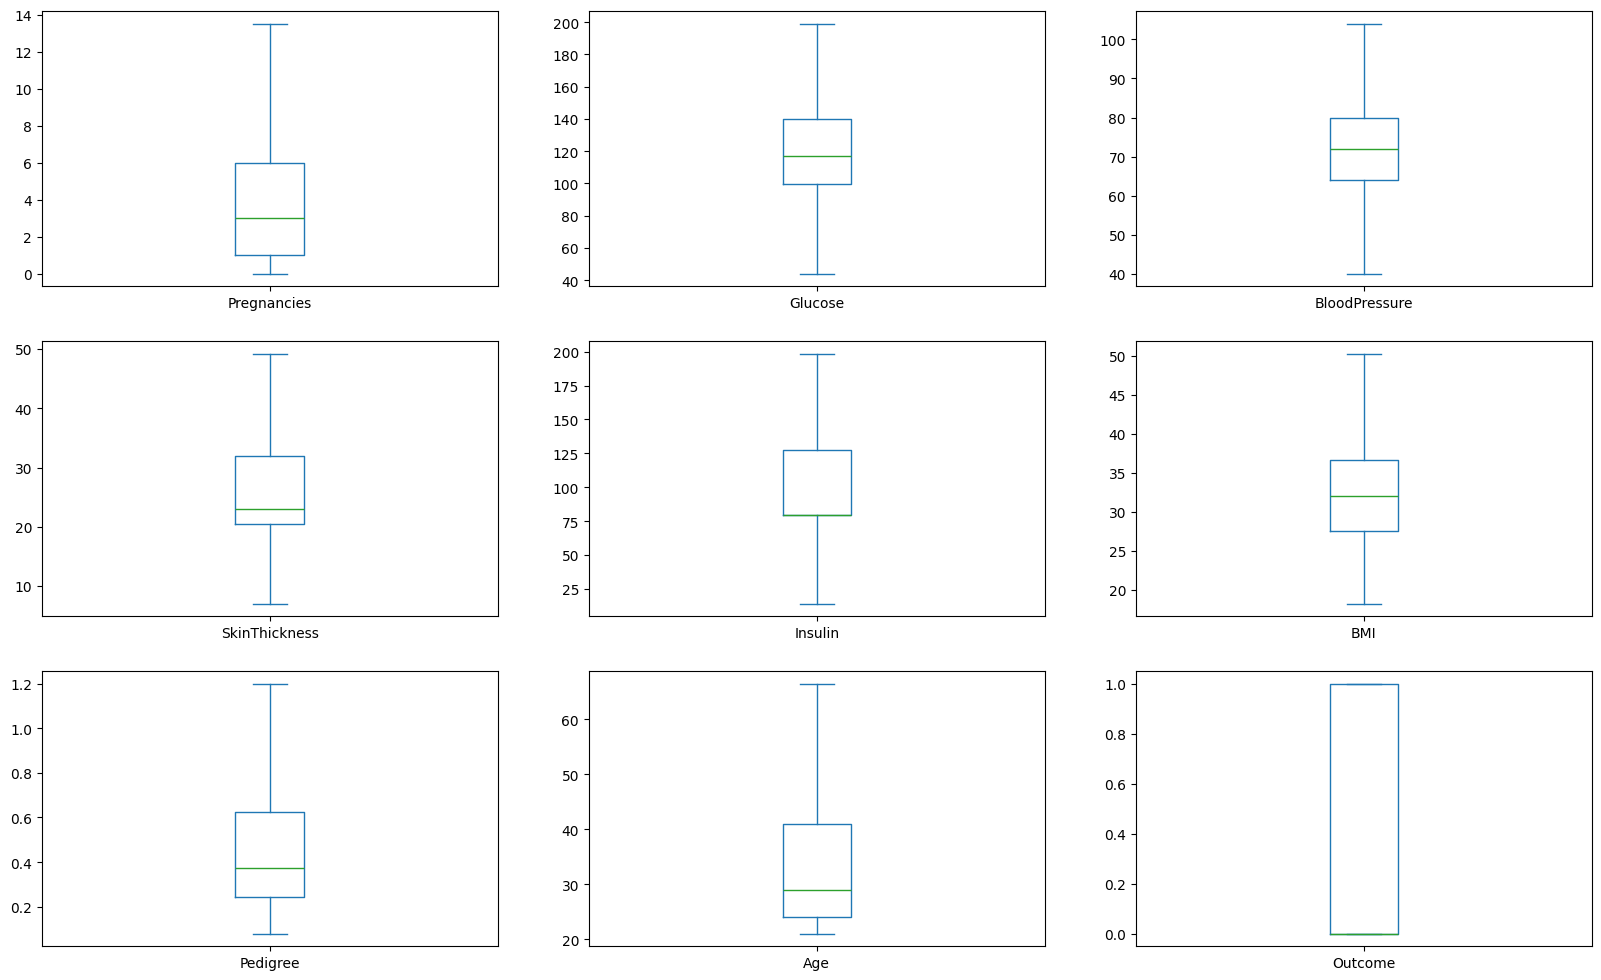

In [16]:
data.plot(kind='box', subplots = True, layout = (6, 3), figsize= (20, 25))

In [17]:
corr = data.corr()
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.126606,0.211257,0.020722,-0.007679,0.027144,-0.017398,0.549695,0.220392
Glucose,0.126606,1.000000,0.220946,0.149026,0.394778,0.234041,0.118236,0.268602,0.492908
BloodPressure,0.211257,0.220946,1.000000,0.145294,0.017952,0.286508,0.015067,0.334903,0.166131
SkinThickness,0.020722,0.149026,0.145294,1.000000,0.303747,0.548198,0.134284,0.013831,0.173868
Insulin,-0.007679,0.394778,0.017952,0.303747,1.000000,0.225814,0.180001,0.038798,0.208749
BMI,0.027144,0.234041,0.286508,0.548198,0.225814,1.000000,0.138545,0.035865,0.313035
Pedigree,-0.017398,0.118236,0.015067,0.134284,0.180001,0.138545,1.000000,0.047289,0.184969
Age,0.549695,0.268602,0.334903,0.013831,0.038798,0.035865,0.047289,1.000000,0.242702
Outcome,0.220392,0.492908,0.166131,0.173868,0.208749,0.313035,0.184969,0.242702,1.000000


<Axes: >

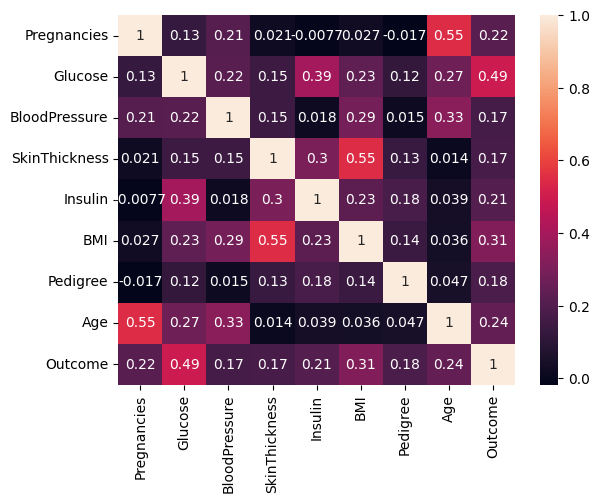

In [18]:
sns.heatmap(corr, annot = True)

In [19]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [22]:
model.score(X_test, y_test)

0.7792207792207793

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[90,  9],
       [25, 30]], dtype=int64)

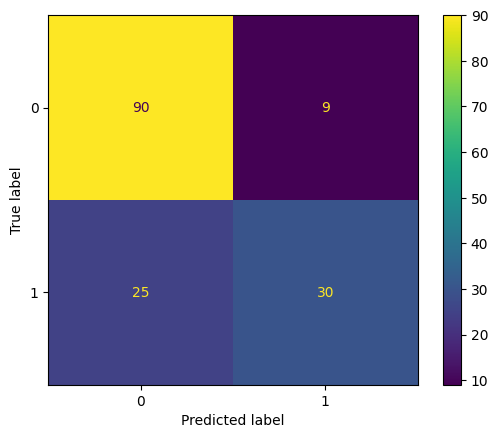

In [26]:
mat = ConfusionMatrixDisplay(cm)
mat.plot()
plt.show()

In [27]:
print("Accuracy: ")
accuracy_score(y_test, y_pred)

Accuracy: 


0.7792207792207793

In [28]:
print("Precision: ")
precision_score(y_test, y_pred)

Precision: 


0.7692307692307693

In [29]:
print("Recall: ")
recall_score(y_test, y_pred)

Recall: 


0.5454545454545454

In [30]:
print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.22077922077922074

In [32]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

